In [4]:
import pandas as pd
df_roi = pd.read_csv('/content/roi_data.csv')
df_spend = pd.read_csv('/content/spend_data.csv')

df_roi.head(5)
df_spend.head(5)

,Month,Channel,Spend
0,Jan,Email,100
1,Jan,SEO,80
2,Jan,Paid Ads,120
3,Jan,Social Media,90
4,Jan,Referrals,70


In [5]:
print(df_roi.isnull().sum())
print(df_spend.isnull().sum())

Month      0
Channel    0
ROI        0
dtype: int64
Month      0
Channel    0
Spend      0
dtype: int64


In [8]:
#merge data on basis of channel & Month

df = pd.merge(df_roi, df_spend, on='Channel')
df.head(5)

df["ROI per Spend"] = df["ROI"] / df["Spend"]

print(df)

     Month_x      Channel  ROI Month_y  Spend  ROI per Spend
0        Jan        Email  420     Jan    100       4.200000
1        Jan        Email  420     Feb    105       4.000000
2        Jan        Email  420     Mar    110       3.818182
3        Jan        Email  420     Apr    108       3.888889
4        Jan        Email  420     May    107       3.925234
...      ...          ...  ...     ...    ...            ...
1003     Dec  Influencers  270     Aug    103       2.621359
1004     Dec  Influencers  270     Sep    104       2.596154
1005     Dec  Influencers  270     Oct    105       2.571429
1006     Dec  Influencers  270     Nov    106       2.547170
1007     Dec  Influencers  270     Dec    108       2.500000

[1008 rows x 6 columns]


In [10]:
#A pivot table (average ROI & Spend by Category).
df["Category"] = df["Channel"].map({
    "Email": "Organic",
    "SEO": "Organic",
    "Paid Ads": "Paid", "Social Media": "Paid", "Referrals" : "Organic", "Display Ads": "Paid", "Influencers": "Organic"
})

pivot = pd.pivot_table(df, values=["ROI", "Spend"], index="Category", aggfunc="mean")
print(pivot)


                 ROI       Spend
Category                        
Organic   290.416667   95.395833
Paid      162.222222  113.277778


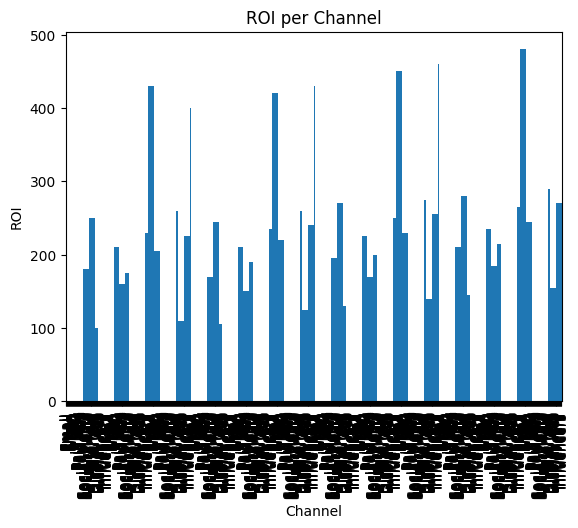

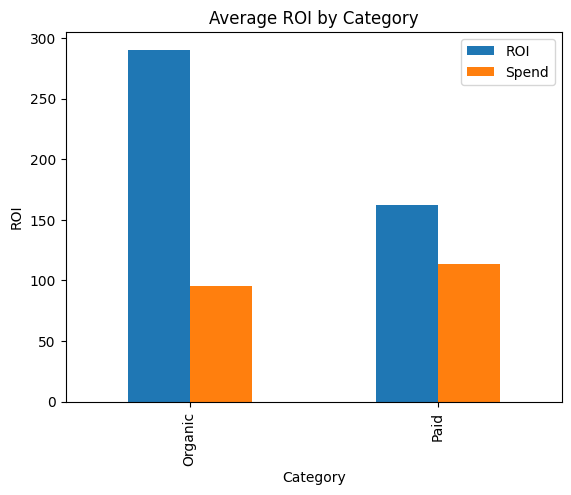

In [12]:
#A bar chart (ROI per Channel).
import matplotlib.pyplot as plt

# Bar chart ROI per channel
df.plot(kind="bar", x="Channel", y="ROI", legend=False)
plt.title("ROI per Channel")
plt.ylabel("ROI")
plt.show()

# Bar chart ROI per category
pivot.plot(kind="bar")
plt.title("Average ROI by Category")
plt.ylabel("ROI")
plt.show()

In [13]:
# Export pivot table to CSV
pivot.to_csv("pivot_summary.csv")

# Export full DataFrame to Excel
df.to_excel("marketing_analysis.xlsx", index=False)